In [2]:
x=(1,2,3)
y=(4,5,6)

In [4]:
x

(1, 2, 3)

In [6]:
x+y

(1, 2, 3, 4, 5, 6)

In [8]:
add(x,y)

NameError: name 'add' is not defined

In [10]:
import numpy as np
a=np.array([1,2,3])
b=np.array([4,5,6])
a+b

array([5, 7, 9])

In [12]:
a-b

array([-3, -3, -3])

ValueError: Argument U has a size 3 which does not match 2000, the number of arrow positions

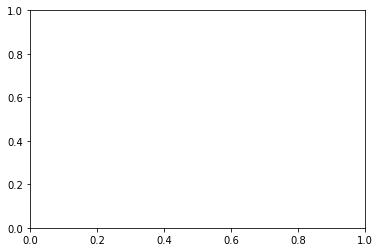

In [16]:
import matplotlib.pyplot as plt
import numpy as np
x,y = np.meshgrid(np.arange(-5,5,0.2), np.arange(-5,5,0.25))
a = np.array([1,2,3])
b = np.array([2,3,4])
fig, ax=plt.subplots()
q=ax.quiver(x,y,a,b)
plt.show()

In [18]:
x

array([[-5. , -4.8, -4.6, ...,  4.4,  4.6,  4.8],
       [-5. , -4.8, -4.6, ...,  4.4,  4.6,  4.8],
       [-5. , -4.8, -4.6, ...,  4.4,  4.6,  4.8],
       ...,
       [-5. , -4.8, -4.6, ...,  4.4,  4.6,  4.8],
       [-5. , -4.8, -4.6, ...,  4.4,  4.6,  4.8],
       [-5. , -4.8, -4.6, ...,  4.4,  4.6,  4.8]])

In [21]:
y

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.75, -4.75, -4.75, ..., -4.75, -4.75, -4.75],
       [-4.5 , -4.5 , -4.5 , ..., -4.5 , -4.5 , -4.5 ],
       ...,
       [ 4.25,  4.25,  4.25, ...,  4.25,  4.25,  4.25],
       [ 4.5 ,  4.5 ,  4.5 , ...,  4.5 ,  4.5 ,  4.5 ],
       [ 4.75,  4.75,  4.75, ...,  4.75,  4.75,  4.75]])

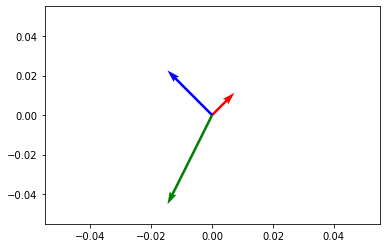

In [53]:
import numpy as np
import matplotlib.pyplot as plt

V = np.array([[1,1], [-2,2], [-2,-4]])
x,y = np.meshgrid(np.arange(-5,5,0.2), np.arange(-5,5,0.2))
origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=15)
#lt.quiver([x,y], V[:,0], V[:,0], color=['r','b','g'], scale=15)
plt.show()

In [54]:
V

array([[ 1,  1],
       [-2,  2],
       [-2, -4]])

In [39]:
V[:,0]

array([ 1, -2, -2])

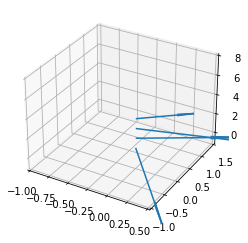

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

soa = np.array([[0, 0, 1, 1, -2, 0], [0, 0, 2, 1, 1, 0],
                [0, 0, 3, 2, 1, 0], [0, 0, 4, 0.5, 0.7, 0]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-1, 0.5])
ax.set_ylim([-1, 1.5])
ax.set_zlim([-1, 8])
plt.show()


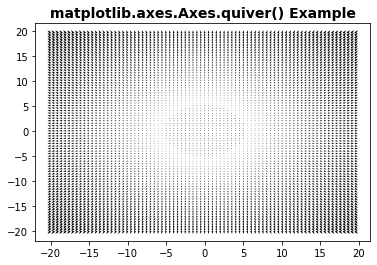

In [71]:
import matplotlib.pyplot as plt 
import numpy as np 
      
X = np.arange(-20, 20, 0.5) 
Y = np.arange(-20, 20, 0.5) 
U, V = np.meshgrid(X, Y) 
  
fig, ax = plt.subplots() 
q = ax.quiver(X, Y, U, V) 
  
ax.set_title('matplotlib.axes.Axes.quiver() Example', fontsize = 14, fontweight ='bold') 
plt.show()

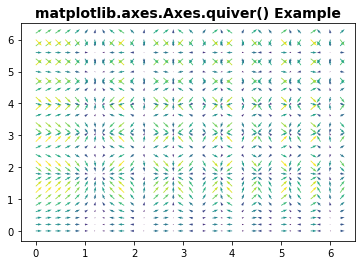

In [73]:
import matplotlib.pyplot as plt 
import numpy as np 
      
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2),  
                   np.arange(0, 2 * np.pi, .2)) 
U = np.cos(X**2) 
V = np.sin(Y**2) 
C = U**2 + V**2
  
fig, ax = plt.subplots() 
ax.quiver(X, Y, U, V, C, units ='width') 
ax.set_title('matplotlib.axes.Axes.quiver() Example', fontsize = 14, fontweight ='bold') 
plt.show()

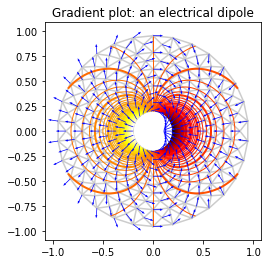

In [77]:
from matplotlib.tri import (
    Triangulation, UniformTriRefiner, CubicTriInterpolator)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


#-----------------------------------------------------------------------------
# Electrical potential of a dipole
#-----------------------------------------------------------------------------
def dipole_potential(x, y):
    """The electric dipole potential V, at position *x*, *y*."""
    r_sq = x**2 + y**2
    theta = np.arctan2(y, x)
    z = np.cos(theta)/r_sq
    return (np.max(z) - z) / (np.max(z) - np.min(z))


#-----------------------------------------------------------------------------
# Creating a Triangulation
#-----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
n_angles = 30
n_radii = 10
min_radius = 0.2
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
V = dipole_potential(x, y)

# Create the Triangulation; no triangles specified so Delaunay triangulation
# created.
triang = Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

#-----------------------------------------------------------------------------
# Refine data - interpolates the electrical potential V
#-----------------------------------------------------------------------------
refiner = UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(V, subdiv=3)

#-----------------------------------------------------------------------------
# Computes the electrical field (Ex, Ey) as gradient of electrical potential
#-----------------------------------------------------------------------------
tci = CubicTriInterpolator(triang, -V)
# Gradient requested here at the mesh nodes but could be anywhere else:
(Ex, Ey) = tci.gradient(triang.x, triang.y)
E_norm = np.sqrt(Ex**2 + Ey**2)

#-----------------------------------------------------------------------------
# Plot the triangulation, the potential iso-contours and the vector field
#-----------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.set_aspect('equal')
# Enforce the margins, and enlarge them to give room for the vectors.
ax.use_sticky_edges = False
ax.margins(0.07)

ax.triplot(triang, color='0.8')

levels = np.arange(0., 1., 0.01)
cmap = cm.get_cmap(name='hot', lut=None)
ax.tricontour(tri_refi, z_test_refi, levels=levels, cmap=cmap,
              linewidths=[2.0, 1.0, 1.0, 1.0])
# Plots direction of the electrical vector field
ax.quiver(triang.x, triang.y, Ex/E_norm, Ey/E_norm,
          units='xy', scale=10., zorder=3, color='blue',
          width=0.007, headwidth=3., headlength=4.)

ax.set_title('Gradient plot: an electrical dipole')
plt.show()

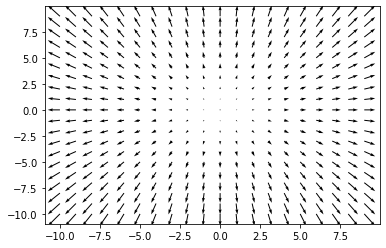

In [82]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)


plt.show()

In [83]:
U

array([[-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9],
       [-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9],
       [-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9],
       [-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9],
       [-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9],
       [-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9],
       [-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9],
       [-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9],
       [-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,  

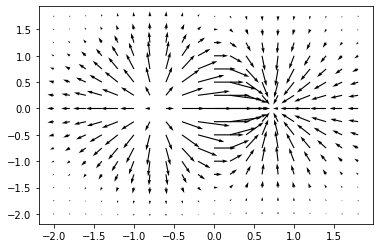

In [86]:
import matplotlib.pyplot as plt
import numpy as np
x,y = np.meshgrid(np.arange(-2,2,0.2), np.arange(-2,2,0.25))
z = x*np.exp(-x**2 - y**2)
v,u = np.gradient(z, .2, .2)
fig, ax = plt.subplots()
q = ax.quiver(x,y,u,v)
plt.show()

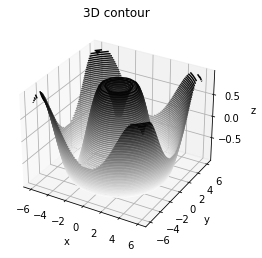

In [91]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def f(x,y):
    return np.sin(np.sqrt(x**2 + y**2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6,30)
 
X, Y = np.meshgrid(x,y)
Z = f(X,Y)

fig = plt.figure();
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()

ValueError: input operand has more dimensions than allowed by the axis remapping

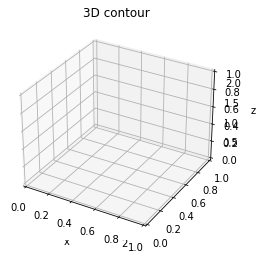

In [130]:
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    return np.sqrt((10-x**2-y**2)/2)

limit = 2.23606
x = np.linspace(-limit, limit, 30)
y = np.linspace(-limit, limit, 30)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)

line = x/2 + y/2

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')

ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)
plt.show()


In [129]:
line

array([-2.23606   , -2.08184897, -1.92763793, -1.7734269 , -1.61921586,
       -1.46500483, -1.31079379, -1.15658276, -1.00237172, -0.84816069,
       -0.69394966, -0.53973862, -0.38552759, -0.23131655, -0.07710552,
        0.07710552,  0.23131655,  0.38552759,  0.53973862,  0.69394966,
        0.84816069,  1.00237172,  1.15658276,  1.31079379,  1.46500483,
        1.61921586,  1.7734269 ,  1.92763793,  2.08184897,  2.23606   ])